Text(0, 0.5, 'Feature 1')

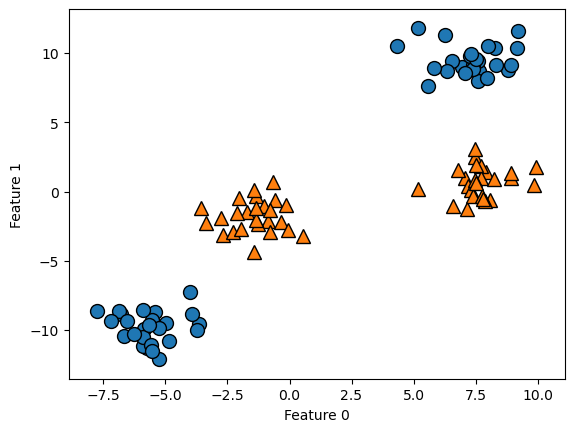

In [5]:
import mglearn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X,y=make_blobs(centers=4,random_state=8)
y=y%2
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

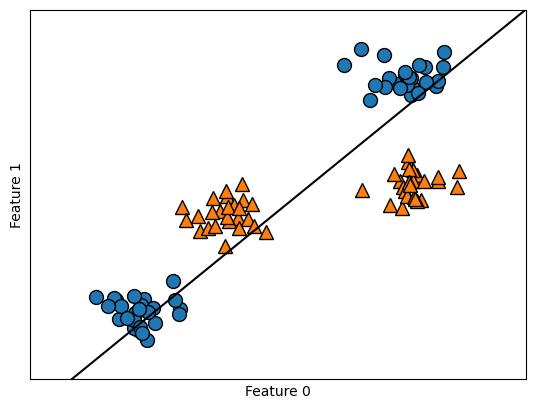

In [6]:
from sklearn.svm import LinearSVC
linear_svm=LinearSVC().fit(X,y)
mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

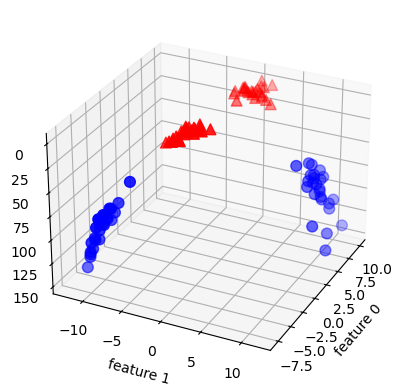

In [7]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

X_new = np.hstack([X, (X[:, 1]**2).reshape(-1, 1)])
figure = plt.figure()
ax = figure.add_subplot(111, projection='3d', elev=-152, azim=-26)
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', s=60)
ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.set_zlabel("feature 1 ** 2")
plt.show()


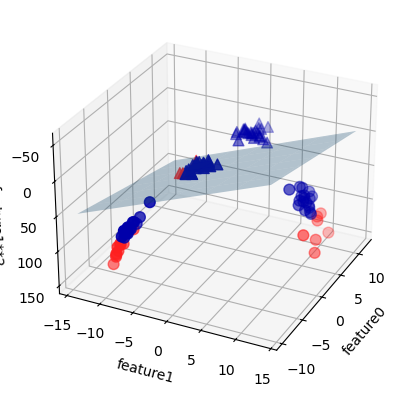

In [8]:
linear_svm_3d=LinearSVC().fit(X_new,y)
coef,intercept=linear_svm_3d.coef_.ravel(),linear_svm_3d.intercept_
figure=plt.figure()
ax=figure.add_subplot(111,projection='3d',elev=-152,azim=-26)
xx=np.linspace(X_new[:,0].min()-2,X_new[:,0].max()+2,50)
yy=np.linspace(X_new[:,1].min()-2,X_new[:,1].max()+2,50)
XX,YY=np.meshgrid(xx,yy)
ZZ=(coef[0]*XX+coef[1]*YY+intercept)/-coef[2]
ax.plot_surface(XX,YY,ZZ,rstride=8,cstride=8,alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c=X_new[mask, 2], cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c=X_new[~mask, 2], cmap=mglearn.cm2, marker='^', s=60)

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1**2")
plt.show()

Text(0, 0.5, 'Feature 1')

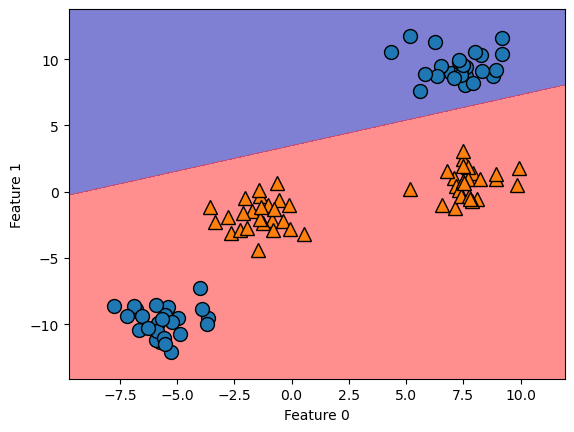

In [9]:
ZZ = YY * 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X_new[:, 0], X_new[:, 1], y)  # 假设 X_new 和 y 已定义
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")



Text(0, 0.5, 'Feature 1')

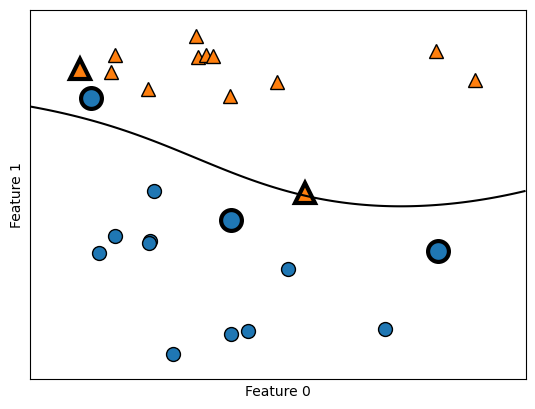

In [10]:
from sklearn.svm import SVC
x, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(x, y)
mglearn.plots.plot_2d_separator(svm, x, eps=.5)
mglearn.discrete_scatter(x[:,0], x[:,1], y)
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0], sv[:,1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

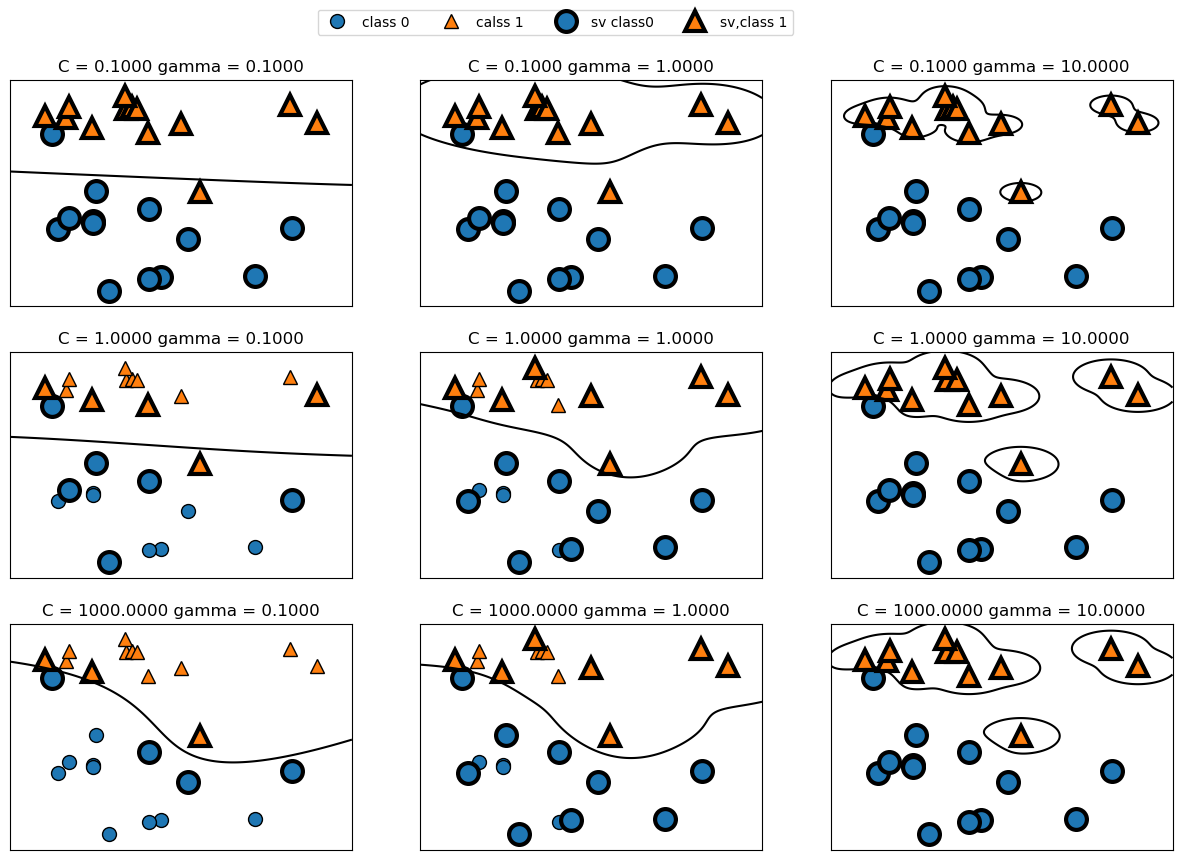

In [11]:
fig,axes=plt.subplots(3,3,figsize=(15,10))
for ax,C in zip(axes,[-1,0,3]):
    for a,gamma in zip(ax,range(-1,2)):
        mglearn.plots.plot_svm(log_C=C,log_gamma=gamma,ax=a)
axes[0,0].legend(["class 0","calss 1","sv class0","sv,class 1"],ncol=4,loc=(.9,1.2))

In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)
svc=SVC()
svc.fit(X_train, y_train)
print("Accuracy on training set:{:.2f}".format(svc.score(X_train,y_train)))
print("Accuracy on test set:{:.2f}".format(svc.score(X_test,y_test)))                                              

Accuracy on training set:0.90
Accuracy on test set:0.94


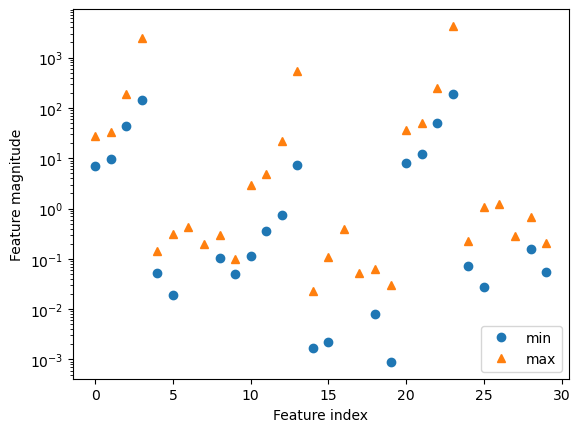

In [18]:
plt.plot(X_train.min(axis=0),'o',label="min")
plt.plot(X_train.max(axis=0),'^',label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

In [19]:
min_on_training=X_train.min(axis=0)
range_on_training=(X_train-min_on_training).max(axis=0)
X_train_scaled=(X_train-min_on_training)/range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n{}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [20]:
X_test_scaled=(X_test-min_on_training)/range_on_training
svc=SVC()
svc.fit(X_train_scaled,y_train)
print("Accuracy on training set:{:.3f}".format(svc.score(X_train_scaled,y_train)))
print("Accuracy on test seet:{:.3f}".format(svc.score(X_test_scaled,y_test)))

Accuracy on training set:0.984
Accuracy on test seet:0.972


In [27]:
svc=SVC(C=1000)
svc.fit(X_train_scaled,y_train)
print("Accuracy on training set:{:.3f}".format(svc.score(X_train_scaled,y_train)))
print("Accuracy on test seet:{:.3f}".format(svc.score(X_test_scaled,y_test)))

Accuracy on training set:1.000
Accuracy on test seet:0.958
